In [128]:
# Import components
import datetime as dt
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
import seaborn as sns
from matplotlib import pyplot as pltw
from pmdarima import arima, datasets, model_selection, utils
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.seasonal import STL

warnings.simplefilter("ignore")

plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")  # グラフのスタイル
plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

In [129]:
df = pd.read_csv("../datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

In [130]:
data_nari = df.loc[(df["User"] == "Narita") & (df["state"] == "ON")]["battery"]

In [131]:
dn_q_95 = pd.DataFrame(data_nari, columns={"battery"})
q = dn_q_95.battery.quantile(0.95)
dn_q_95 = dn_q_95.query("battery < @q")

In [132]:
clf = LocalOutlierFactor(n_neighbors=5)
X = np.array(data_nari)
X_2 = np.array(dn_q_95)

X = X.reshape(len(X), 1)
X_2 = X_2.reshape(len(X_2), 1)

pred = clf.fit_predict(X)
pred2 = clf.fit_predict(X_2)

X_3 = X[np.where(pred > 0)]
X_3 = pd.Series(X_3.reshape(1, len(X_3))[0])

X_4 = X_2[np.where(pred2 > 0)]
X_4 = pd.Series(X_2.reshape(1, len(X_2))[0])

In [127]:
# sns.scatterplot(data=data_nari, color="blue")
# sns.scatterplot(data=X, color="red")
# sns.scatterplot(data=X_2, color="black")
# sns.scatterplot(data=X_3, color="pink")
# sns.scatterplot(data=X_4, color="yellow")

<AxesSubplot:ylabel='Density'>

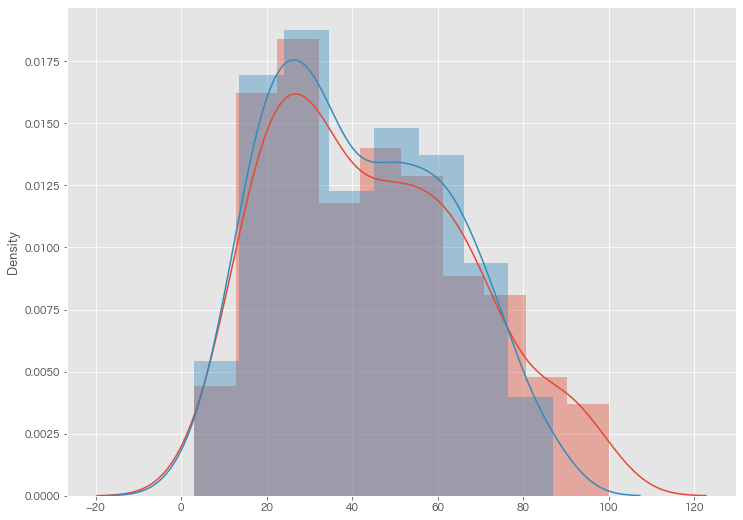

In [133]:
# sns.distplot(data_nari)
sns.distplot(X)
sns.distplot(X_2)